In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
np.random.seed(42)


In [4]:
employee_ids = [f"EMP_{i:03d}" for i in range (1,31)] 
dates = pd. date_range("2025-07-01",periods=30, freq="D")

In [5]:
data = { 
        "Date": np.tile(dates, len(employee_ids)), 
        "Employee_ID" : np.repeat(employee_ids, len(dates)), 
        "Working_Hours": np.random.uniform(4, 10, size=len(dates) * len(employee_ids)).round(2) 
 } 

In [6]:
df=pd.DataFrame (data)

In [7]:
df.to_csv("employee_working_hours.csv", index=False)

In [8]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [9]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [10]:
 total_hours = df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [11]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [12]:
threshold_low = 5 
threshold_high = 9

In [13]:
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high 

In [14]:
print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head()) 

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 

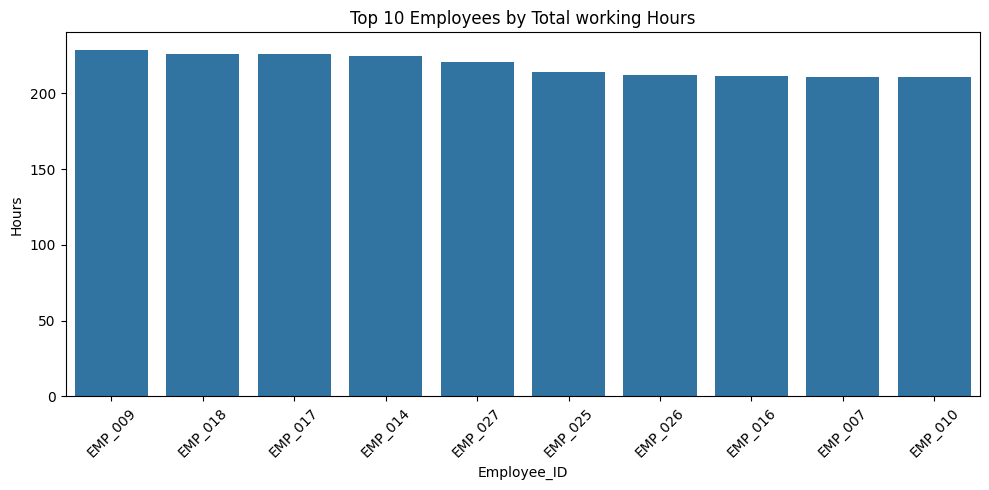

In [16]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.barplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 Employees by Total working Hours") 
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show()

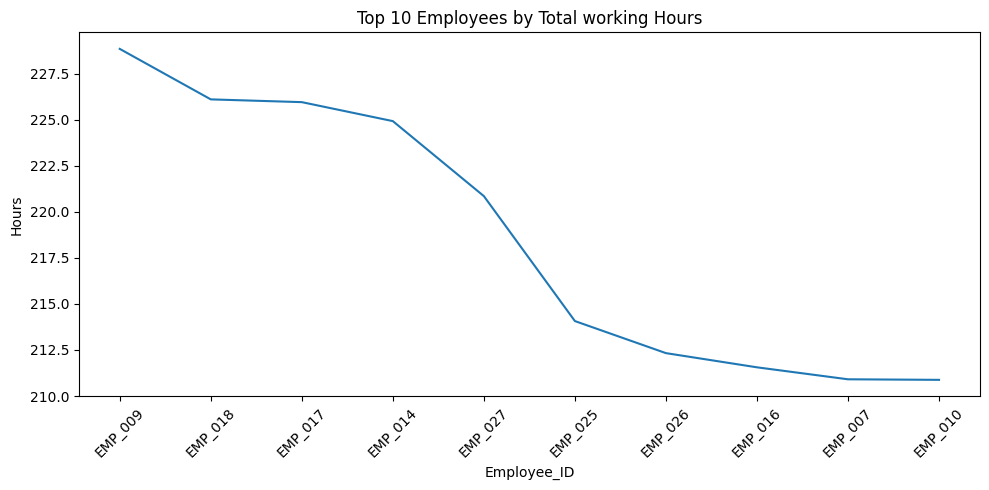

In [17]:
top10 = total_hours.head(10) 
plt.figure(figsize=(10,5)) 
sns.lineplot(x=top10.index, y=top10.values) 
plt.xticks(rotation=45) 
plt.title("Top 10 Employees by Total working Hours") 
plt.ylabel("Hours") 
plt.tight_layout() 
plt.show()